# Hepatitis Survival Prediction

+ Feature Selection
+ Data Exploration
+ Plotting 
+ Build Model
+ Interpret and Evaluate
+ Confusion Metrics
+ Productionize
+ Deployment

## Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas_profiling
import sweetviz
import seaborn as sns

In [2]:
data = pd.read_csv("hepatitis.csv")

---

---

## 1. Feature Selection

- #### SelectKBest
    - Used to select the features that are strongly corelated to output 
    
- #### Recursive Feature Elimination
    - Used to eliminate the features that are not useful
    
- #### ExtraTreesClassifier
    - Used to select the important features

In [3]:
data.tail()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,0,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,0,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75,20,4.1,0,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2
154,1,43,1,2,2,1,2,2,2,2,1,1,1,2,1.2,100,19,3.1,42,2


<h3 style="color:red">Warning</h3>
<br>
   Dont run below cell twice<br>
   If you have run twice, restart kernel and rerun the code from first cell

In [4]:
"""
making 2 as 1 and 1 as 0 of class column
"""
class_map={1:0, 2:1}
data["class"] = data["class"].map(class_map)

In [5]:
"""
we have to predict class

class 0 --- Dead
class 1 --- Survived

"""
data.tail()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
150,0,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,0,242,3.3,50,2
151,1,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,0,2
152,1,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75,20,4.1,0,2
153,1,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2
154,0,43,1,2,2,1,2,2,2,2,1,1,1,2,1.2,100,19,3.1,42,2


In [6]:
data.isnull().sum()

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   class            155 non-null    int64  
 1   age              155 non-null    int64  
 2   sex              155 non-null    int64  
 3   steroid          155 non-null    int64  
 4   antivirals       155 non-null    int64  
 5   fatigue          155 non-null    int64  
 6   malaise          155 non-null    int64  
 7   anorexia         155 non-null    int64  
 8   liver_big        155 non-null    int64  
 9   liver_firm       155 non-null    int64  
 10  spleen_palpable  155 non-null    int64  
 11  spiders          155 non-null    int64  
 12  ascites          155 non-null    int64  
 13  varices          155 non-null    int64  
 14  bilirubin        155 non-null    float64
 15  alk_phosphate    155 non-null    int64  
 16  sgot             155 non-null    int64  
 17  albumin         

In [8]:
data.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,0.793548,41.200000,1.103226,1.496774,1.845161,1.341935,1.593548,1.780645,1.709677,1.470968,1.741935,1.606452,1.806452,1.819355,1.372258,85.619355,83.677419,3.423226,35.116129,1.451613
std,0.406070,12.565878,0.305240,0.514393,0.362923,0.489350,0.505769,0.430508,0.580727,0.627401,0.507588,0.552406,0.471207,0.462503,1.219992,62.061686,89.527688,1.318343,35.221923,0.499266
min,0.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,51.000000,30.500000,3.050000,0.000000,1.000000
50%,1.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,84.000000,55.000000,3.900000,35.000000,1.000000
75%,1.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,1.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [9]:
"""
Using SelectKBest
"""

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [10]:
"""
Selecting X and y from the dataset
"""

cols = data.columns.to_list()
cols

['class',
 'age',
 'sex',
 'steroid',
 'antivirals',
 'fatigue',
 'malaise',
 'anorexia',
 'liver_big',
 'liver_firm',
 'spleen_palpable',
 'spiders',
 'ascites',
 'varices',
 'bilirubin',
 'alk_phosphate',
 'sgot',
 'albumin',
 'protime',
 'histology']

In [11]:
X_col = cols[1:]
y_col = cols[0]

In [12]:
print(X_col)  # Columns of X
print()
print(y_col) # Columns of y

['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime', 'histology']

class


In [13]:
X = data[X_col]
y = data[y_col]

In [14]:
# Using SelectKBest
skb = SelectKBest(score_func=chi2, k=10) # Selecting features according to 10 highest scores

best_features = skb.fit(X,y)

In [15]:
best_features.scores_

array([ 28.47481919,   0.38948319,   0.3995129 ,   0.18634161,
         2.34643234,   2.46803203,   0.19648065,   0.31698209,
         0.9867095 ,   0.74535155,   3.18940804,   2.09639954,
         1.12812176,  30.10247172,  17.88270548,  47.38820795,
         6.87318606, 130.18332457,   3.01854675])

In [16]:
"""
Creating DataFrame from scores
"""

scores = pd.DataFrame(best_features.scores_, columns=["Best Scores"])

In [17]:
scores

,Best Scores
0,28.474819
1,0.389483
2,0.399513
3,0.186342
4,2.346432
5,2.468032
6,0.196481
7,0.316982
8,0.986710
9,0.745352


In [18]:
"""
Getting the columns name
"""

data_columns_name = pd.DataFrame(X.columns, columns=["Columns Name"])
data_columns_name

,Columns Name
0,age
1,sex
2,steroid
3,antivirals
4,fatigue
5,malaise
6,anorexia
7,liver_big
8,liver_firm
9,spleen_palpable


In [19]:
columns_scores = pd.concat([data_columns_name, scores], axis=1)

In [20]:
columns_scores

,Columns Name,Best Scores
0,age,28.474819
1,sex,0.389483
2,steroid,0.399513
3,antivirals,0.186342
4,fatigue,2.346432
5,malaise,2.468032
6,anorexia,0.196481
7,liver_big,0.316982
8,liver_firm,0.986710
9,spleen_palpable,0.745352


#### Note
- We have to find the columns that have the highest scores
- The columns that have highest scores will be the most important columns

In [21]:
"""
Sorting the dataframe by descending order according to 'Best Scores' column
"""
columns_scores.sort_values(by='Best Scores',ascending=False,inplace=True)
columns_scores

,Columns Name,Best Scores
17,protime,130.183325
15,sgot,47.388208
13,bilirubin,30.102472
0,age,28.474819
14,alk_phosphate,17.882705
16,albumin,6.873186
10,spiders,3.189408
18,histology,3.018547
5,malaise,2.468032
4,fatigue,2.346432


### Note
- protime is the most important feature of them all
- antivirals is not that important

In [22]:
"""
Finding the top features that have scores greater than 2
"""
column_scores_new = columns_scores[columns_scores["Best Scores"].values>2.3]

In [23]:
column_scores_new  #Most important features

,Columns Name,Best Scores
17,protime,130.183325
15,sgot,47.388208
13,bilirubin,30.102472
0,age,28.474819
14,alk_phosphate,17.882705
16,albumin,6.873186
10,spiders,3.189408
18,histology,3.018547
5,malaise,2.468032
4,fatigue,2.346432


### Optional Methods for Feature Selection

+ Recursive Feature Elimination (RFE)
+ ExtraTreeClassifier

### ** Note **
- These are completely optional methods to select important features

#### RFE

In [24]:
from warnings import filterwarnings
filterwarnings(action="ignore")

In [25]:
"""
RFE
"""
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
rfe = RFE(lr,8)
rfe.fit(X,y)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=8, step=1, verbose=0)

In [26]:
rfe.ranking_

array([ 8,  1,  5,  9,  1,  1,  1,  4,  6,  7,  1,  2,  3,  1, 11, 10,  1,
       12,  1])

In [27]:
rfe.support_

array([False,  True, False, False,  True,  True,  True, False, False,
       False,  True, False, False,  True, False, False,  True, False,
        True])

In [28]:
rfe_rankings = pd.DataFrame({"RFE Ranking": rfe.ranking_, "RFE Support": rfe.support_})

In [29]:
rfe_data = pd.concat([data_columns_name, rfe_rankings], axis=1)

In [30]:
rfe_data

,Columns Name,RFE Ranking,RFE Support
0,age,8,False
1,sex,1,True
2,steroid,5,False
3,antivirals,9,False
4,fatigue,1,True
5,malaise,1,True
6,anorexia,1,True
7,liver_big,4,False
8,liver_firm,6,False
9,spleen_palpable,7,False


In [31]:
"""
Sorting the dataframe according to highest ranking, False Support

Highest Ranking -- Highest Priority

"""

rfe_data.sort_values(by="RFE Ranking", ascending=False, inplace=True)
rfe_data.nlargest(12,"RFE Ranking")

,Columns Name,RFE Ranking,RFE Support
17,protime,12,False
14,alk_phosphate,11,False
15,sgot,10,False
3,antivirals,9,False
0,age,8,False
9,spleen_palpable,7,False
8,liver_firm,6,False
2,steroid,5,False
7,liver_big,4,False
12,varices,3,False


#### Another Optional Method

In [32]:
"""
Extra Tree Classifier for checking importance of features
"""
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [33]:
etc.feature_importances_

array([0.05613145, 0.02028736, 0.02643612, 0.01231693, 0.02600731,
       0.05340584, 0.02419321, 0.03898588, 0.05902056, 0.04073918,
       0.07686964, 0.08698767, 0.05553272, 0.0862343 , 0.06890828,
       0.05228292, 0.0800562 , 0.069609  , 0.06599543])

In [34]:
etc_imp_data = pd.DataFrame(etc.feature_importances_, columns=['Important Features'])

In [35]:
etc_imp_data

,Important Features
0,0.056131
1,0.020287
2,0.026436
3,0.012317
4,0.026007
5,0.053406
6,0.024193
7,0.038986
8,0.059021
9,0.040739


In [36]:
etc_data = pd.concat([data_columns_name, etc_imp_data], axis=1)

In [37]:
etc_data.sort_values(by='Important Features', inplace=True, ascending=False)

In [38]:
etc_data.head(12)  #Selecting 12 best features

,Columns Name,Important Features
11,ascites,0.086988
13,bilirubin,0.086234
16,albumin,0.080056
10,spiders,0.076870
17,protime,0.069609
14,alk_phosphate,0.068908
18,histology,0.065995
8,liver_firm,0.059021
0,age,0.056131
12,varices,0.055533


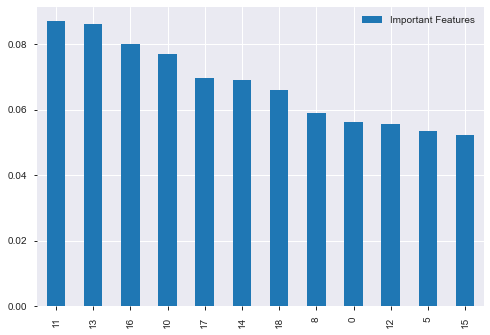

In [39]:
etc_data.head(12).plot(kind='bar')

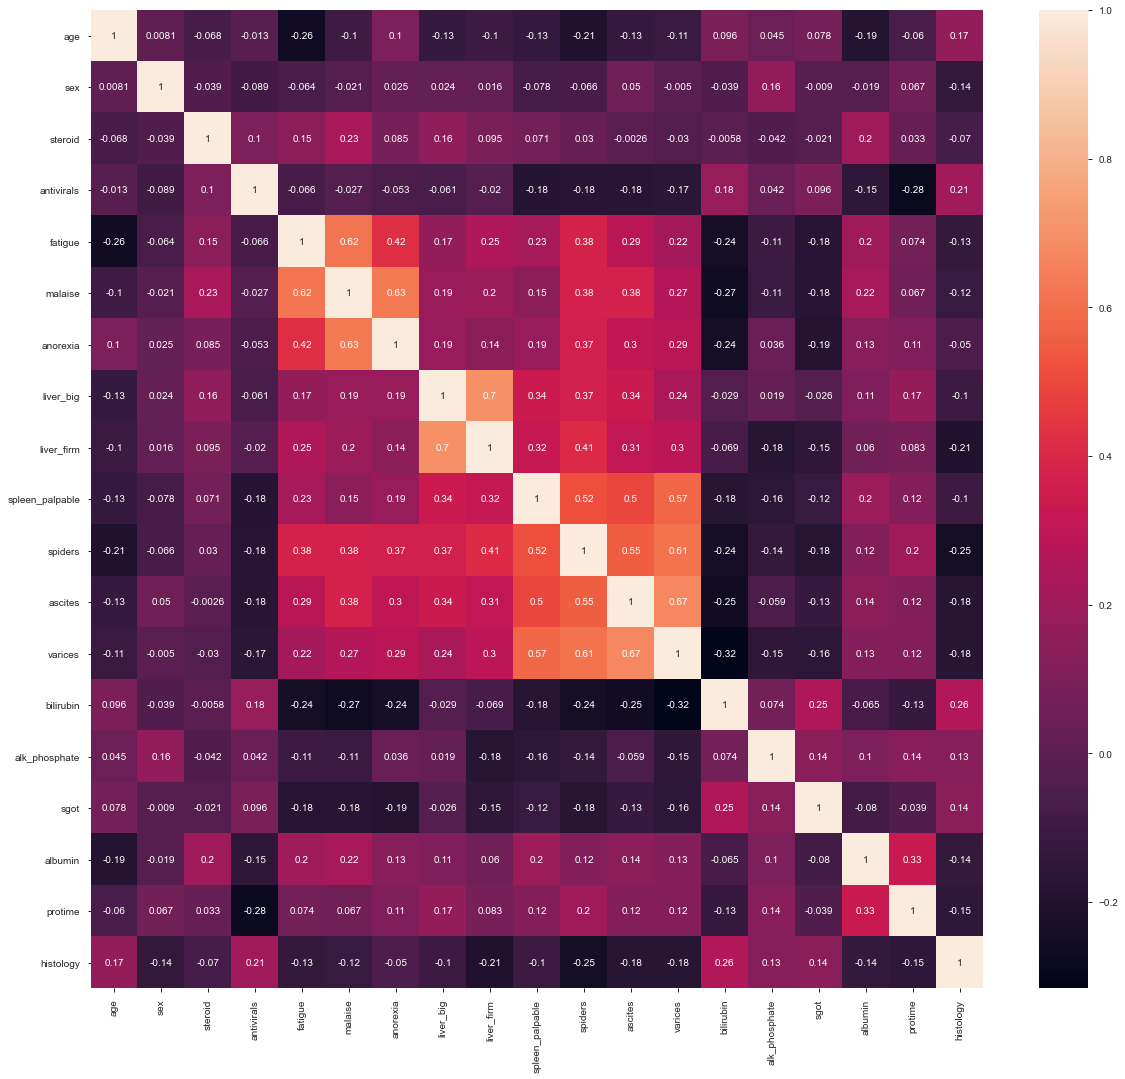

In [40]:
plt.figure(figsize=(20,18))
sns.heatmap(X.corr(), annot=True)  #Corelation

### Selecting the important features and removing the unnecessary ones

In [24]:
data_cols = list(column_scores_new["Columns Name"].values)

In [25]:
data_cols  ### These are important features

['protime',
 'sgot',
 'bilirubin',
 'age',
 'alk_phosphate',
 'albumin',
 'spiders',
 'histology',
 'malaise',
 'fatigue']

---

---

## 2. Data Exploration, Analysis and Plotting

### Sweetviz Report
- Used for Data Visualization

In [ ]:
"""
Go to directory to see the entire report in HTML
"""

EDAreport = sweetviz.analyze(data)
EDAreport.show_html()

----

### Pandas Profiling

In [43]:
"""
Useful tool for EDA
You can also check the html file in directory 
"""
pandas_profile = pandas_profiling.ProfileReport(data)
pandas_profile.to_widgets()

In [ ]:
pandas_profile.to_file("Pandas Profiling.html") # Generates the HTML file in the working directory

In [44]:
print(data.shape)
print(data.size)

(155, 20)
3100


In [45]:
# As seen above, there are no null values

In [26]:
data.dtypes

class                int64
age                  int64
sex                  int64
steroid              int64
antivirals           int64
fatigue              int64
malaise              int64
anorexia             int64
liver_big            int64
liver_firm           int64
spleen_palpable      int64
spiders              int64
ascites              int64
varices              int64
bilirubin          float64
alk_phosphate        int64
sgot                 int64
albumin            float64
protime              int64
histology            int64
dtype: object

In [27]:
data["sex"].value_counts()
# male - 1
# female - 2

1    139
2     16
Name: sex, dtype: int64

In [28]:
data["class"].value_counts()
# Survival as 1
# Dead as 0

1    123
0     32
Name: class, dtype: int64

Text(0, 0.5, 'Count')

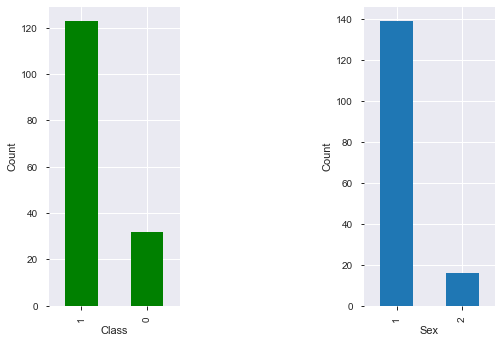

In [29]:
plt.subplot(1,3,1)  #subplot(row,col,position)
data["class"].value_counts().plot(kind="bar", color="g")
plt.xlabel("Class")
plt.ylabel("Count")

plt.subplot(1,3,3)
data["sex"].value_counts().plot(kind="bar")
plt.xlabel("Sex")
plt.ylabel("Count")

In [30]:
print(data["age"].min())
print(data["age"].max())

7
78


----

### Setting cumulative frequency for different age group

In [31]:
labels=["0-10","10-20",'20-30','30-40','40-50','50-60','60-70','70+']
bins=[0,10,20,30,40,50,60,70,80]
age_freq = data.groupby(pd.cut(data['age'], bins=bins, labels=labels)).size()

In [32]:
age_freq

age
0-10      1
10-20     3
20-30    29
30-40    50
40-50    35
50-60    24
60-70    11
70+       2
dtype: int64

In [33]:
age_freq.reset_index(name="count")

,age,count
0,0-10,1
1,10-20,3
2,20-30,29
3,30-40,50
4,40-50,35
5,50-60,24
6,60-70,11
7,70+,2


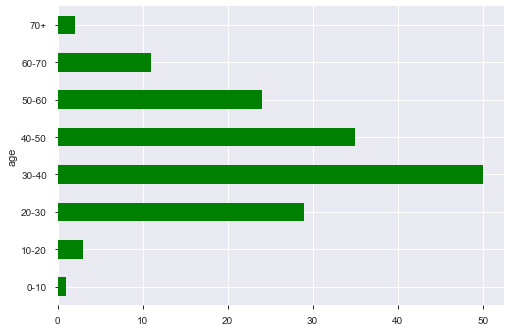

In [34]:
age_freq.plot(kind="barh",color="green")  #Age 30-40 is affected more by hepatitis

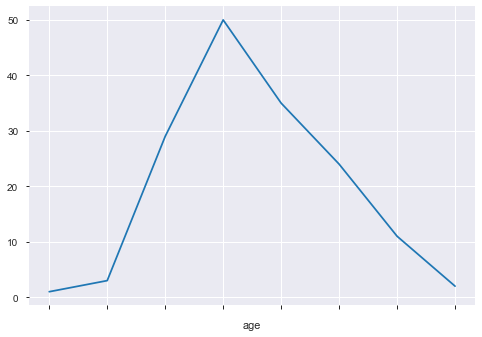

In [35]:
age_freq.plot(kind="line")

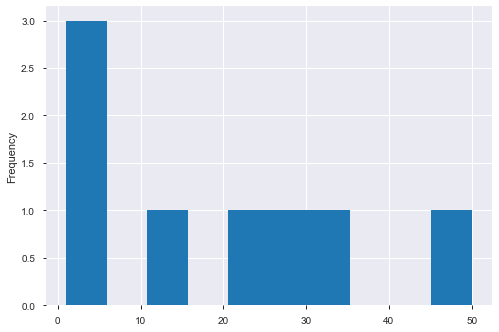

In [56]:
age_freq.plot(kind="hist")

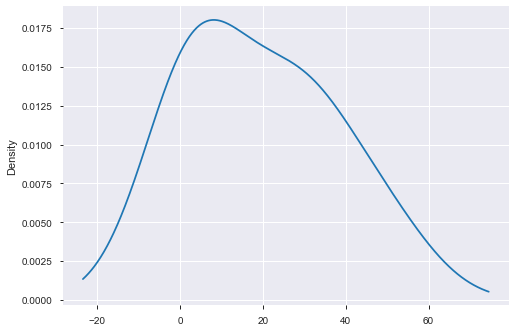

In [57]:
age_freq.plot(kind="kde")

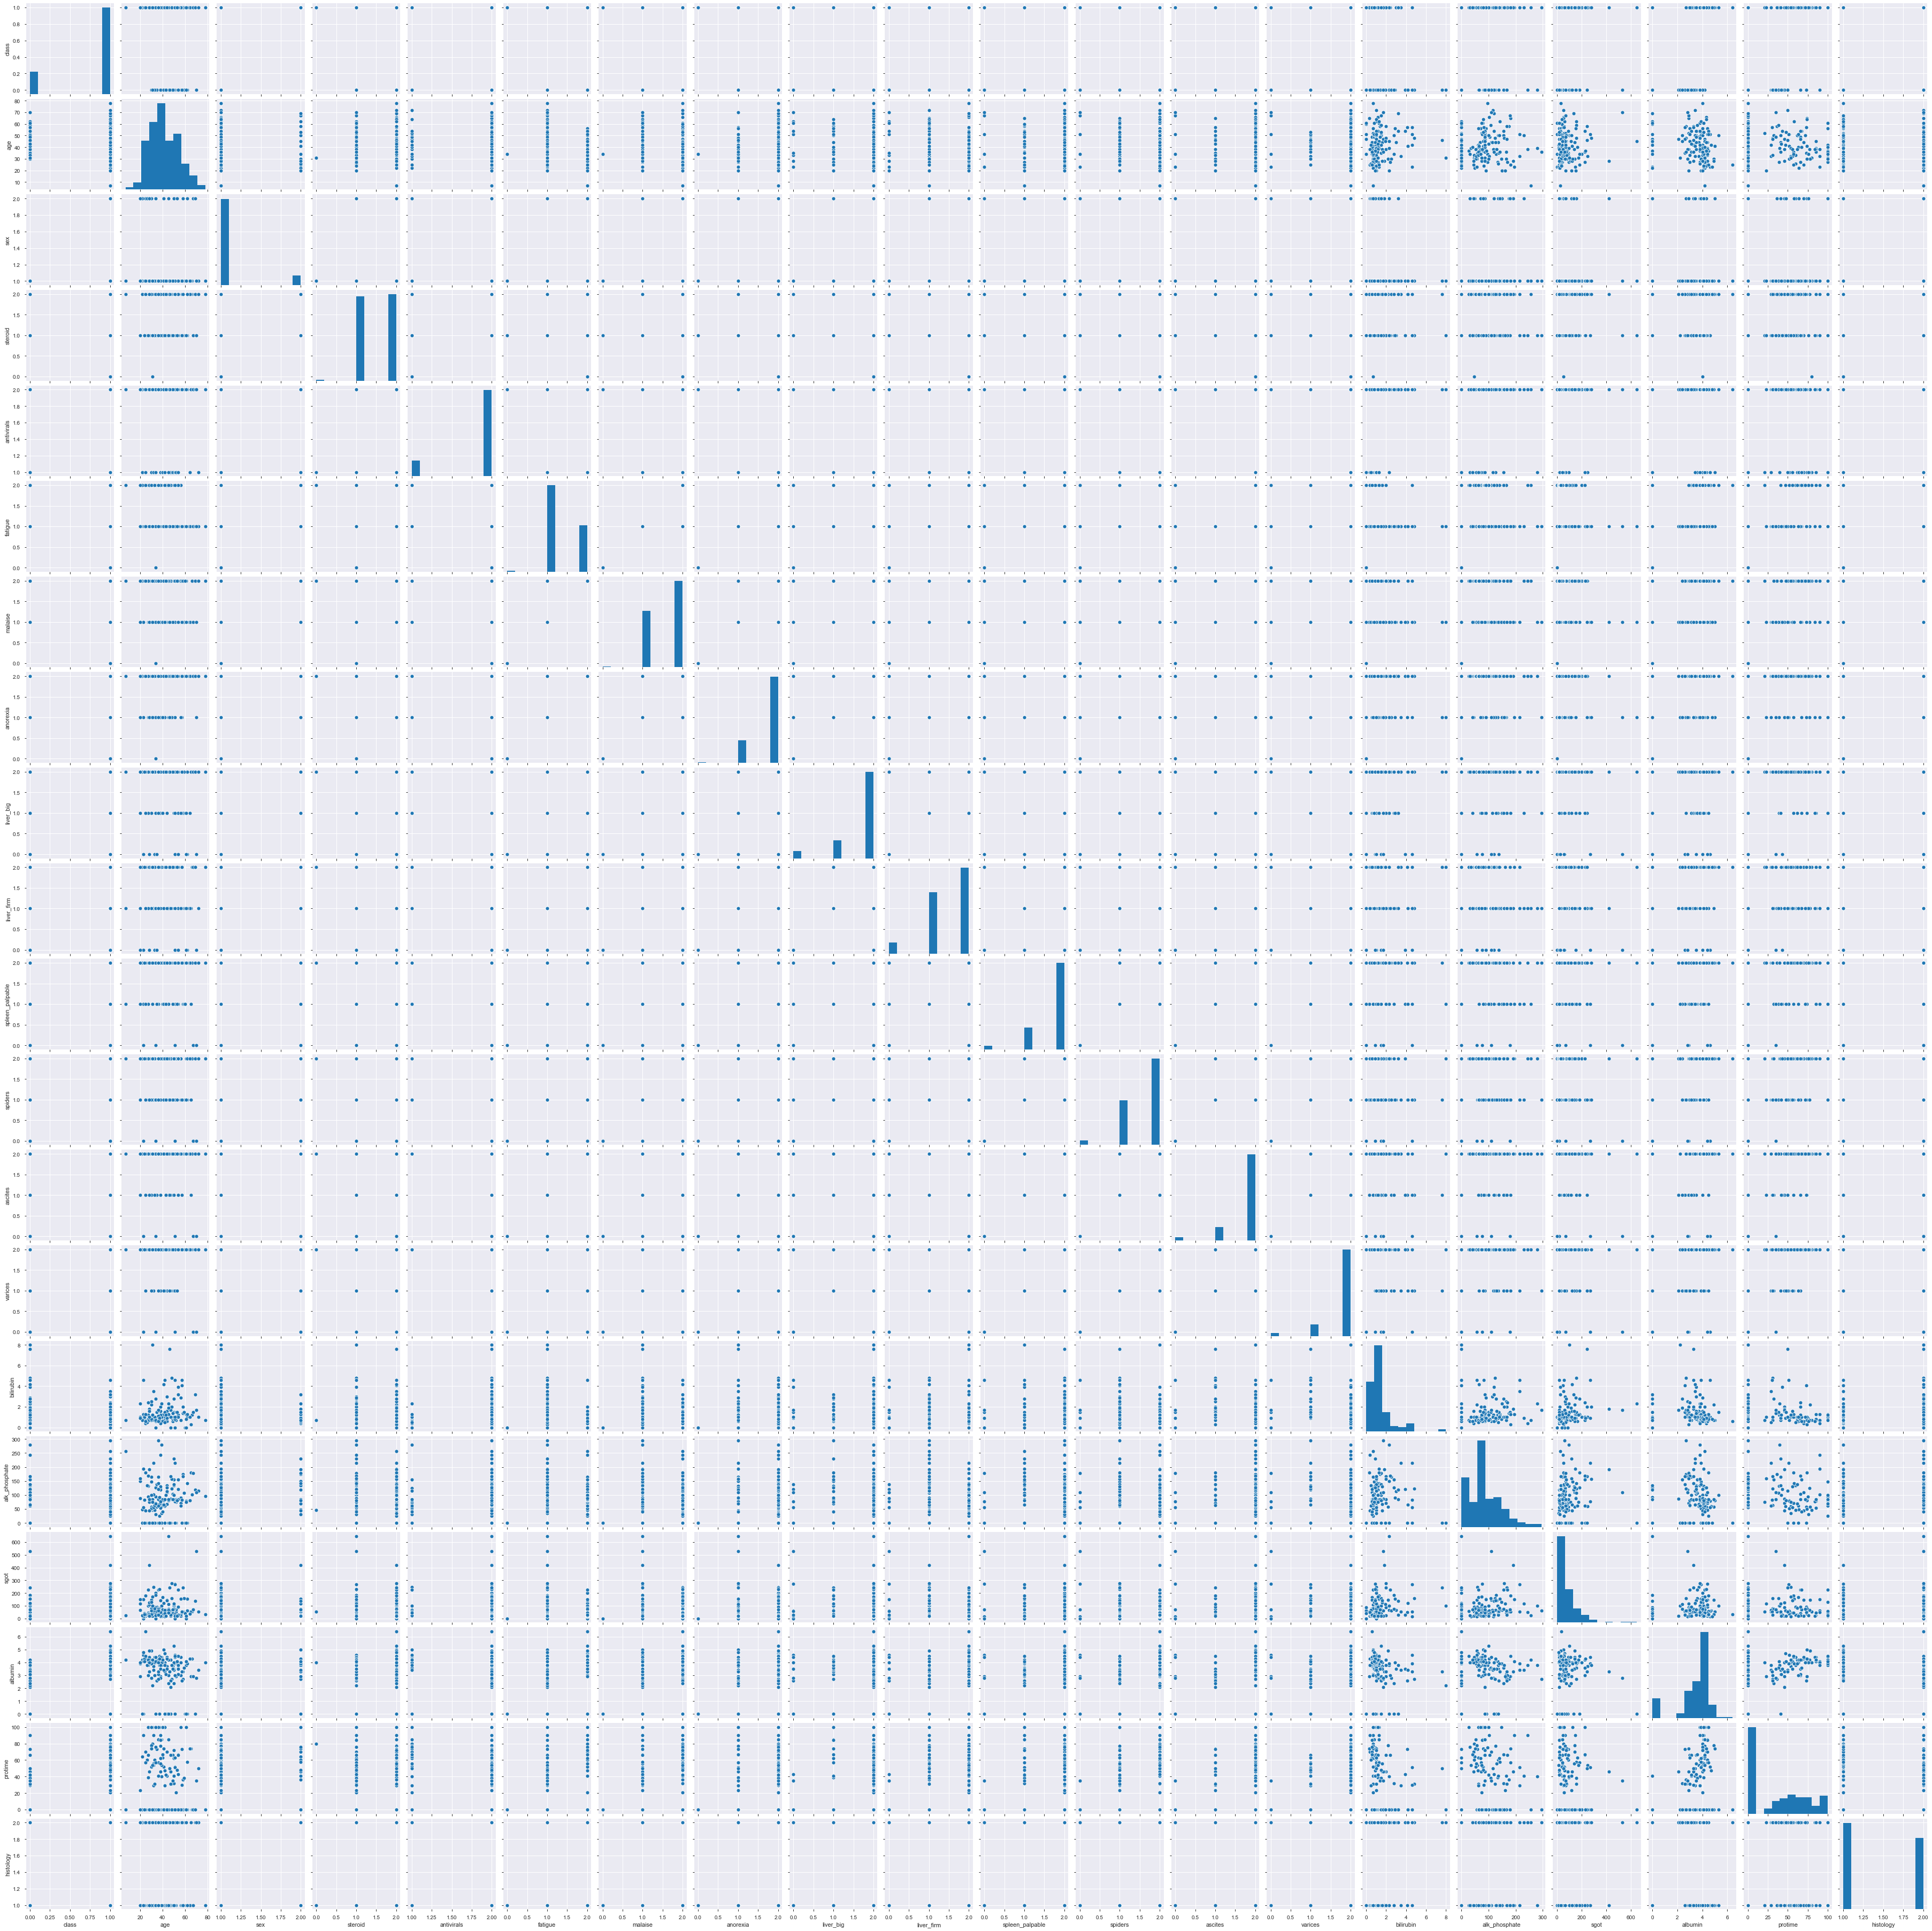

In [58]:
sns.pairplot(data)

----

### Univariate Analysis and Multivariate Analysis
 - Analysis using box plot and scatter plot 
 + Outlier Detection

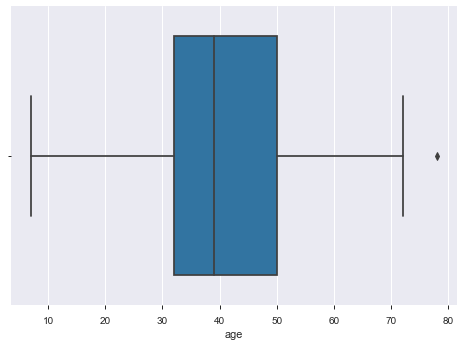

In [36]:
#Box plot for univariate feature, outlier detection
sns.boxplot(data["age"])

### From figure above:

+ Outlier is at around 80 years of age
+ We have to remove the outlier by eliminatiing it
+ But first find out all other outliers

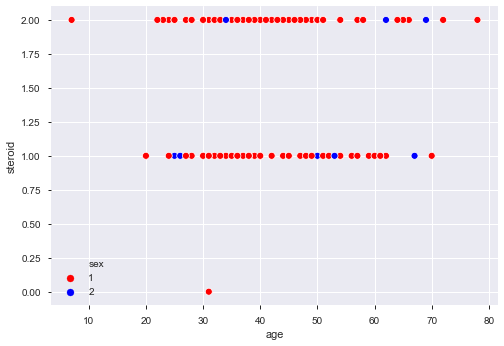

In [37]:
sns.scatterplot(data["age"], data["steroid"], hue=data["sex"],palette=["red","blue"])


### Insight
- Male takes more steroid than females 

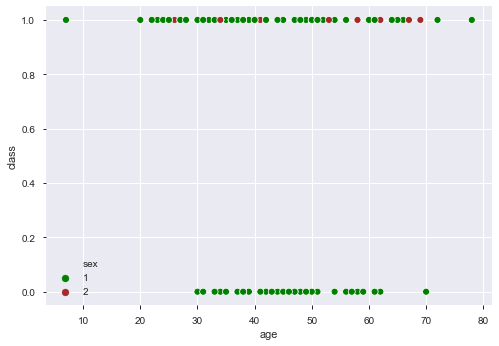

In [38]:
sns.scatterplot(data["age"], data["class"], hue=data["sex"], palette=["green",'brown'])

### Insight

+ Age 30-60 died mostly from hepatitis
+ Age 10-30 and 60 above mostly survived
+ Most of the died person are male

---

### Inter Quartile Range for multiple Outlier Detection

In [39]:
"""
Before removing outliers, lets make the new data that have only important features
"""
bst_x = data[data_cols]
bst_y = data['class']

In [40]:
bst_y = pd.DataFrame(data["class"], columns=["class"])
bst_y

,class
0,1
1,1
2,1
3,1
4,1
...,...
150,0
151,1
152,1
153,1


### Important Note:
<h4 style="color: green"> Outlier detection must be done only on features columns not on target columns</h4>

In [41]:
new_data = bst_x
new_data.head()

,protime,sgot,bilirubin,age,alk_phosphate,albumin,spiders,histology,malaise,fatigue
0,0,18,1.0,30,85,4.0,2,1,2,2
1,0,42,0.9,50,135,3.5,2,1,2,1
2,0,32,0.7,78,96,4.0,2,1,2,1
3,80,52,0.7,31,46,4.0,2,1,2,2
4,0,200,1.0,34,0,4.0,2,1,2,2


In [42]:
new_data.tail()

,protime,sgot,bilirubin,age,alk_phosphate,albumin,spiders,histology,malaise,fatigue
150,50,242,7.6,46,0,3.3,1,2,1,1
151,0,142,0.9,44,126,4.3,2,2,2,1
152,0,20,0.8,61,75,4.1,1,2,1,1
153,48,19,1.5,53,81,4.1,1,2,2,1
154,42,19,1.2,43,100,3.1,1,2,2,1


In [43]:
"""
Now we will use IQR to detect multiple outlier from the dataset

The formula for IQR is Q3-Q1
So we have to calculate Q3 and Q1 first

Q1 - 25%
Q3 - 75%

"""

Q1 = new_data.quantile(0.25)
Q3 = new_data.quantile(0.75)
IQR = Q3-Q1
IQR

protime          65.00
sgot             68.50
bilirubin         0.80
age              18.00
alk_phosphate    68.50
albumin           1.15
spiders           1.00
histology         1.00
malaise           1.00
fatigue           1.00
dtype: float64

### Insight

- Columns -- "age", "alk_phosphate", "sgot", "protime" have high values
- Above columns have maximum outliers

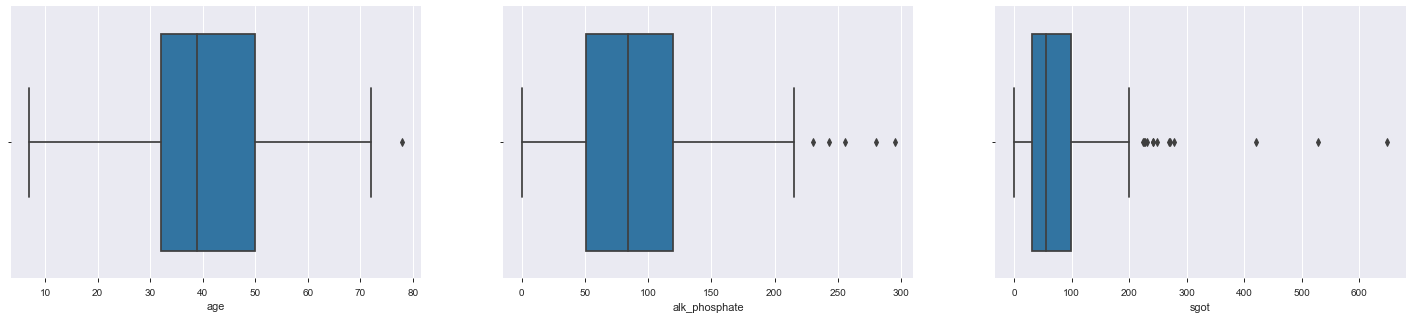

In [44]:
"""
Verifying the outliers by boxplot
"""
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.boxplot(data['age'])

plt.subplot(1,3,2)
sns.boxplot(new_data['alk_phosphate'])

plt.subplot(1,3,3)
sns.boxplot(new_data["sgot"])

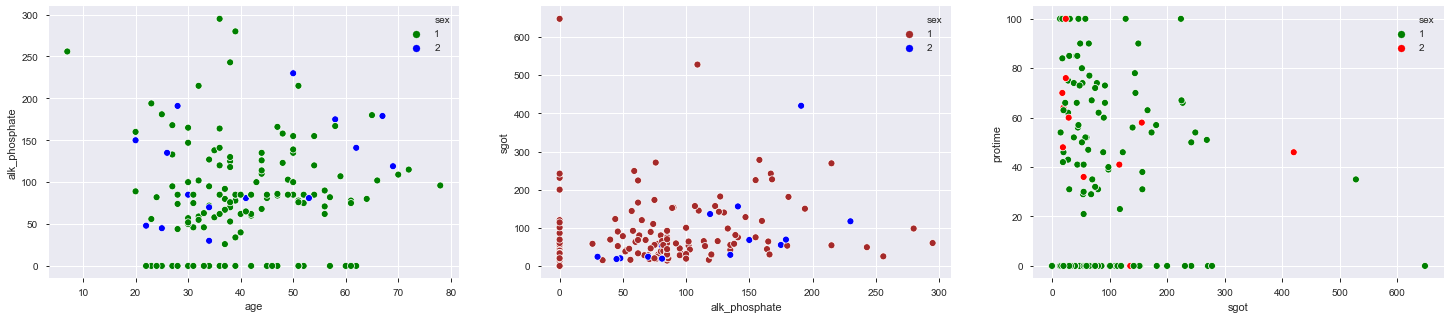

In [45]:
"""
Verifying outliers by Scatter plot based on gender
"""

plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.scatterplot(new_data['age'], new_data['alk_phosphate'], hue=data['sex'], palette=["green",'blue'])

plt.subplot(1,3,2)
sns.scatterplot(new_data['alk_phosphate'], new_data['sgot'], hue=data['sex'], palette=["brown",'blue'])

plt.subplot(1,3,3)
sns.scatterplot(new_data["sgot"], new_data['protime'], hue=data['sex'], palette=["green",'red'])

---

### Getting exact outliers

In [46]:
(new_data < (Q1 - 1.5 * IQR)) | (new_data > (Q3 + 1.5 * IQR))

,protime,sgot,bilirubin,age,alk_phosphate,albumin,spiders,histology,malaise,fatigue
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
150,False,True,True,False,False,False,False,False,False,False
151,False,False,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,False,False
153,False,False,False,False,False,False,False,False,False,False


### Insights
- Here the data points that are true are actual outliers. They are very far from mean

In [47]:
"""
Replacing the outliers with NaN

"""
data_no_outliers = new_data[~((new_data < (Q1 - 1.5 * IQR)) | (new_data > (Q3 + 1.5 * IQR)))] # ~ sign denotes the not 

In [48]:
data_no_outliers

,protime,sgot,bilirubin,age,alk_phosphate,albumin,spiders,histology,malaise,fatigue
0,0,18.0,1.0,30.0,85.0,4.0,2,1,2,2
1,0,42.0,0.9,50.0,135.0,3.5,2,1,2,1
2,0,32.0,0.7,NaN,96.0,4.0,2,1,2,1
3,80,52.0,0.7,31.0,46.0,4.0,2,1,2,2
4,0,200.0,1.0,34.0,0.0,4.0,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...
150,50,NaN,NaN,46.0,0.0,3.3,1,2,1,1
151,0,142.0,0.9,44.0,126.0,4.3,2,2,2,1
152,0,20.0,0.8,61.0,75.0,4.1,1,2,1,1
153,48,19.0,1.5,53.0,81.0,4.1,1,2,2,1


### Insights
- Outliers are replaced by NaN Values


In [49]:
print(new_data.shape)
print(data_no_outliers.shape)

(155, 10)
(155, 10)


In [50]:
dno = data_no_outliers

In [51]:
dno.head()

,protime,sgot,bilirubin,age,alk_phosphate,albumin,spiders,histology,malaise,fatigue
0,0,18.0,1.0,30.0,85.0,4.0,2,1,2,2
1,0,42.0,0.9,50.0,135.0,3.5,2,1,2,1
2,0,32.0,0.7,NaN,96.0,4.0,2,1,2,1
3,80,52.0,0.7,31.0,46.0,4.0,2,1,2,2
4,0,200.0,1.0,34.0,0.0,4.0,2,1,2,2


In [52]:
dno.isnull().sum()

protime           0
sgot             13
bilirubin        17
age               1
alk_phosphate     5
albumin          17
spiders           0
histology         0
malaise           0
fatigue           0
dtype: int64

#### These all above NaN values are outliers

In [53]:
"""
Lets see the percentage of NaN values for each columns(Percentage of outliers)
"""

dno.isnull().mean() 

protime          0.000000
sgot             0.083871
bilirubin        0.109677
age              0.006452
alk_phosphate    0.032258
albumin          0.109677
spiders          0.000000
histology        0.000000
malaise          0.000000
fatigue          0.000000
dtype: float64

### Notes:
- albumin and bilirubin have bigger numbers of outliers

### Removing the NaN Values
1. .any() function is used to return all the values that matches the condition
2. In our case, the condition was to return all the values that are only false
3. So, .any() returns all the rows that have no NaN values

### Important Note
- Before removing outlier, we have to append the target column

In [54]:
"""
Adding sex column and class column dont matter coz they are already categorical and dont have outliers
"""
dno['sex'] = data["sex"]
dno['class'] = data["class"]

In [55]:
dno.tail()

,protime,sgot,bilirubin,age,alk_phosphate,albumin,spiders,histology,malaise,fatigue,sex,class
150,50,NaN,NaN,46.0,0.0,3.3,1,2,1,1,1,0
151,0,142.0,0.9,44.0,126.0,4.3,2,2,2,1,1,1
152,0,20.0,0.8,61.0,75.0,4.1,1,2,1,1,1,1
153,48,19.0,1.5,53.0,81.0,4.1,1,2,2,1,2,1
154,42,19.0,1.2,43.0,100.0,3.1,1,2,2,1,1,0


In [56]:
dno.dropna(axis=0,inplace=True)  #drops the NaN (Outliers)

In [57]:
dno.tail()

,protime,sgot,bilirubin,age,alk_phosphate,albumin,spiders,histology,malaise,fatigue,sex,class
149,0,30.0,0.6,36.0,120.0,4.0,2,2,2,2,1,1
151,0,142.0,0.9,44.0,126.0,4.3,2,2,2,1,1,1
152,0,20.0,0.8,61.0,75.0,4.1,1,2,1,1,1,1
153,48,19.0,1.5,53.0,81.0,4.1,1,2,2,1,2,1
154,42,19.0,1.2,43.0,100.0,3.1,1,2,2,1,1,0


In [58]:
dno.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 154
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   protime        107 non-null    int64  
 1   sgot           107 non-null    float64
 2   bilirubin      107 non-null    float64
 3   age            107 non-null    float64
 4   alk_phosphate  107 non-null    float64
 5   albumin        107 non-null    float64
 6   spiders        107 non-null    int64  
 7   histology      107 non-null    int64  
 8   malaise        107 non-null    int64  
 9   fatigue        107 non-null    int64  
 10  sex            107 non-null    int64  
 11  class          107 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 10.9 KB


In [59]:
dno["class"].value_counts()

1    94
0    13
Name: class, dtype: int64

### Note:
- If after removing the outliers, all of our class type 0 is removed because of small dataset, we will use whole dataset for model building

----

---

## 3. Model Building

### Importing necessary packages

In [60]:
"""
-  Building the model using various powerful techniques like ANN, XGBoost, Random Forest, AdaBoost, CatBoost
-  Comparing the accuracies and selecting the best model

"""
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, mean_absolute_error,f1_score,mean_squared_error
from sklearn.model_selection import GridSearchCV,train_test_split,RandomizedSearchCV

import keras
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Activation,Dropout, BatchNormalization
from keras.models import Sequential

import xgboost,catboost

import pickle, joblib

Using TensorFlow backend.


In [61]:
"""
This is very important
Always choose the dataset that have no outliers
"""
X_final = dno.iloc[:,0:-1]
y_final = dno.iloc[:,-1]

In [62]:
"""
Boosting and bagging dont need scaling since thier base model is decision tree
"""
X_train,X_test,y_train,y_test = train_test_split(X_final, y_final, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_final.shape)
print(y_final.shape)

(80, 11)
(27, 11)
(80,)
(27,)
(107, 11)
(107,)


In [63]:
y_test.value_counts()

1    22
0     5
Name: class, dtype: int64

---

#### XGBoost Classifier

In [85]:
xgbst = xgboost.XGBClassifier()

In [86]:
params={
    "max_depth":[5,15,25,35,45],
    "learning_rate":list(np.linspace(0.01,0.9, 15)),
    "colsample_bytree":list(np.linspace(0.1,0.9,10)),
    "alpha": list(np.linspace(0.1,0.9,10))
}
rscv_xgb = RandomizedSearchCV(xgbst,params,scoring="accuracy",cv=10, random_state=2)
rscv_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,...
                                                          0.13714285714285715,
                                                          0.20071428571428573,
                                                          0.264285

In [87]:
rscv_xgb.score(X_test, y_test)

0.7777777777777778

In [126]:
rscv_xgb.best_params_

{'max_depth': 45,
 'learning_rate': 0.6457142857142857,
 'colsample_bytree': 0.6333333333333333,
 'alpha': 0.8111111111111111}

In [88]:
rscv_xgb.best_score_

0.925

----

#### AdaBoost Classifier

In [89]:
adbst = AdaBoostClassifier()

In [90]:
params1={
    "n_estimators":[5,15,25,35,45,50],
    "learning_rate":list(np.linspace(0.01,0.9, 15))
}
rscv_adb = RandomizedSearchCV(adbst,params1,scoring="accuracy",cv=10, random_state=2)
rscv_adb.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=None),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': [0.01,
                                                          0.07357142857142857,
                                                          0.13714285714285715,
                                                          0.20071428571428573,
                                                          0.2642857142857143,
                                                          0.32785714285714285,
                                                          0.39142857142857146,
                     

In [91]:
rscv_adb.best_params_

{'n_estimators': 50, 'learning_rate': 0.7728571428571429}

In [92]:
rscv_adb.best_score_

0.975

In [93]:
rscv_adb.score(X_test, y_test)

0.7777777777777778

---

#### Catboost Classifier

In [64]:
ctbst = catboost.CatBoostClassifier()

In [65]:
params2={
    "n_estimators":[5,15,25,35,45,50],
    "learning_rate":list(np.linspace(0.01,0.9, 15)),
    "max_depth":[1,3,5,7,9,11,13,15]
    
}
rscv_ctb = RandomizedSearchCV(ctbst,params2,scoring="accuracy",cv=10, random_state=2)
rscv_ctb.fit(X_train, y_train)

E:\Anaconda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0:	learn: 0.5882782	total: 574ms	remaining: 2.29s
1:	learn: 0.4949370	total: 577ms	remaining: 866ms
2:	learn: 0.3766819	total: 579ms	remaining: 386ms
3:	learn: 0.3360741	total: 581ms	remaining: 145ms
4:	learn: 0.2866999	total: 583ms	remaining: 0us
0:	learn: 0.6130191	total: 4.01ms	remaining: 16ms
1:	learn: 0.5092840	total: 7.22ms	remaining: 10.8ms
2:	learn: 0.3883072	total: 8.46ms	remaining: 5.64ms
3:	learn: 0.3576916	total: 10.3ms	remaining: 2.57ms
4:	learn: 0.3070731	total: 12.3ms	remaining: 0us
0:	learn: 0.6113113	total: 3.93ms	remaining: 15.7ms
1:	learn: 0.5047419	total: 6.75ms	remaining: 10.1ms
2:	learn: 0.3761079	total: 8.04ms	remaining: 5.36ms
3:	learn: 0.3309242	total: 9.25ms	remaining: 2.31ms
4:	learn: 0.2995957	total: 12.1ms	remaining: 0us
0:	learn: 0.6057808	total: 4.15ms	remaining: 16.6ms
1:	learn: 0.4998889	total: 5.39ms	remaining: 8.08ms
2:	learn: 0.3928993	total: 7.02ms	remaining: 4.68ms
3:	learn: 0.3389358	total: 9.05ms	remaining: 2.26ms
4:	learn: 0.3057315	total: 10.8m

0:	learn: 0.5302882	total: 1.77ms	remaining: 42.4ms
1:	learn: 0.3840385	total: 2.85ms	remaining: 32.7ms
2:	learn: 0.3432575	total: 3.88ms	remaining: 28.5ms
3:	learn: 0.3011207	total: 4.91ms	remaining: 25.8ms
4:	learn: 0.2541034	total: 5.95ms	remaining: 23.8ms
5:	learn: 0.2223805	total: 6.99ms	remaining: 22.1ms
6:	learn: 0.1861442	total: 8.02ms	remaining: 20.6ms
7:	learn: 0.1558084	total: 9.05ms	remaining: 19.2ms
8:	learn: 0.1410650	total: 10.1ms	remaining: 17.9ms
9:	learn: 0.1235586	total: 11.2ms	remaining: 16.8ms
10:	learn: 0.1053864	total: 12.2ms	remaining: 15.6ms
11:	learn: 0.0930304	total: 13.6ms	remaining: 14.7ms
12:	learn: 0.0835708	total: 14.8ms	remaining: 13.6ms
13:	learn: 0.0760766	total: 15.9ms	remaining: 12.5ms
14:	learn: 0.0695185	total: 17.5ms	remaining: 11.6ms
15:	learn: 0.0643589	total: 18.7ms	remaining: 10.5ms
16:	learn: 0.0576649	total: 19.8ms	remaining: 9.32ms
17:	learn: 0.0538985	total: 21ms	remaining: 8.17ms
18:	learn: 0.0507402	total: 22.2ms	remaining: 7ms
19:	lear

0:	learn: 0.6778206	total: 9.76ms	remaining: 332ms
1:	learn: 0.6587627	total: 11.6ms	remaining: 191ms
2:	learn: 0.6209261	total: 14.1ms	remaining: 150ms
3:	learn: 0.5877671	total: 15.6ms	remaining: 121ms
4:	learn: 0.5663925	total: 17.5ms	remaining: 105ms
5:	learn: 0.5557282	total: 26.9ms	remaining: 130ms
6:	learn: 0.5050473	total: 27.7ms	remaining: 111ms
7:	learn: 0.4917631	total: 29.7ms	remaining: 100ms
8:	learn: 0.4634162	total: 30.6ms	remaining: 88.4ms
9:	learn: 0.4537480	total: 40.6ms	remaining: 102ms
10:	learn: 0.4428314	total: 49.9ms	remaining: 109ms
11:	learn: 0.4340414	total: 59.3ms	remaining: 114ms
12:	learn: 0.4180240	total: 61.4ms	remaining: 104ms
13:	learn: 0.4083188	total: 63.8ms	remaining: 95.7ms
14:	learn: 0.4015278	total: 68.3ms	remaining: 91ms
15:	learn: 0.3862561	total: 70.5ms	remaining: 83.7ms
16:	learn: 0.3761498	total: 72.2ms	remaining: 76.5ms
17:	learn: 0.3668354	total: 80.4ms	remaining: 75.9ms
18:	learn: 0.3604061	total: 89.5ms	remaining: 75.3ms
19:	learn: 0.3351

0:	learn: 0.6720278	total: 8.33ms	remaining: 283ms
1:	learn: 0.6455311	total: 18.2ms	remaining: 300ms
2:	learn: 0.5993875	total: 20.3ms	remaining: 217ms
3:	learn: 0.5636804	total: 21.9ms	remaining: 170ms
4:	learn: 0.5398136	total: 23.4ms	remaining: 141ms
5:	learn: 0.5266764	total: 26.1ms	remaining: 126ms
6:	learn: 0.5085374	total: 30.7ms	remaining: 123ms
7:	learn: 0.4958198	total: 41.4ms	remaining: 140ms
8:	learn: 0.4643134	total: 42.6ms	remaining: 123ms
9:	learn: 0.4547096	total: 53.2ms	remaining: 133ms
10:	learn: 0.4471699	total: 63.7ms	remaining: 139ms
11:	learn: 0.4392628	total: 73.2ms	remaining: 140ms
12:	learn: 0.4271816	total: 76.1ms	remaining: 129ms
13:	learn: 0.4201431	total: 80.3ms	remaining: 121ms
14:	learn: 0.4088566	total: 90.1ms	remaining: 120ms
15:	learn: 0.3934914	total: 91.3ms	remaining: 108ms
16:	learn: 0.3797012	total: 95.4ms	remaining: 101ms
17:	learn: 0.3657490	total: 96.6ms	remaining: 91.2ms
18:	learn: 0.3588410	total: 106ms	remaining: 89.5ms
19:	learn: 0.3460867	

0:	learn: 0.6407506	total: 1.81ms	remaining: 7.26ms
1:	learn: 0.5926335	total: 2.73ms	remaining: 4.1ms
2:	learn: 0.5751372	total: 3.9ms	remaining: 2.6ms
3:	learn: 0.5460232	total: 4.91ms	remaining: 1.23ms
4:	learn: 0.5029210	total: 5.78ms	remaining: 0us
0:	learn: 0.6543866	total: 1.85ms	remaining: 7.42ms
1:	learn: 0.6021543	total: 3ms	remaining: 4.5ms
2:	learn: 0.5796657	total: 4.06ms	remaining: 2.71ms
3:	learn: 0.5511037	total: 5.23ms	remaining: 1.31ms
4:	learn: 0.5114500	total: 6.08ms	remaining: 0us
0:	learn: 0.6564641	total: 1.8ms	remaining: 7.21ms
1:	learn: 0.6083610	total: 3.1ms	remaining: 4.65ms
2:	learn: 0.5874088	total: 4.31ms	remaining: 2.87ms
3:	learn: 0.5563494	total: 5.47ms	remaining: 1.37ms
4:	learn: 0.5145900	total: 6.75ms	remaining: 0us
0:	learn: 0.6587585	total: 1.33ms	remaining: 5.32ms
1:	learn: 0.6108068	total: 2.62ms	remaining: 3.93ms
2:	learn: 0.5924607	total: 3.69ms	remaining: 2.46ms
3:	learn: 0.5632098	total: 4.73ms	remaining: 1.18ms
4:	learn: 0.5212132	total: 5.9

0:	learn: 0.4748436	total: 2.57ms	remaining: 126ms
1:	learn: 0.4082716	total: 4.13ms	remaining: 99.1ms
2:	learn: 0.3028795	total: 5.37ms	remaining: 84.1ms
3:	learn: 0.2547497	total: 7.06ms	remaining: 81.2ms
4:	learn: 0.2171119	total: 8.59ms	remaining: 77.3ms
5:	learn: 0.1890895	total: 10.1ms	remaining: 74.1ms
6:	learn: 0.1683607	total: 11.7ms	remaining: 71.7ms
7:	learn: 0.1501565	total: 13.4ms	remaining: 70.3ms
8:	learn: 0.1335937	total: 14.9ms	remaining: 67.9ms
9:	learn: 0.1205226	total: 16.4ms	remaining: 65.7ms
10:	learn: 0.1092702	total: 17.9ms	remaining: 63.5ms
11:	learn: 0.1011727	total: 19.5ms	remaining: 61.7ms
12:	learn: 0.0905374	total: 21ms	remaining: 59.8ms
13:	learn: 0.0818358	total: 22.5ms	remaining: 57.9ms
14:	learn: 0.0755522	total: 24.2ms	remaining: 56.4ms
15:	learn: 0.0701841	total: 26.1ms	remaining: 55.5ms
16:	learn: 0.0646394	total: 27.6ms	remaining: 53.5ms
17:	learn: 0.0606240	total: 29ms	remaining: 51.6ms
18:	learn: 0.0570913	total: 30.6ms	remaining: 50ms
19:	learn:

0:	learn: 0.5422168	total: 5.37ms	remaining: 263ms
1:	learn: 0.4132705	total: 7.02ms	remaining: 168ms
2:	learn: 0.3202981	total: 8.47ms	remaining: 133ms
3:	learn: 0.2568459	total: 10.2ms	remaining: 117ms
4:	learn: 0.2192928	total: 11.9ms	remaining: 107ms
5:	learn: 0.2004861	total: 13.4ms	remaining: 98.2ms
6:	learn: 0.1788952	total: 15.1ms	remaining: 92.6ms
7:	learn: 0.1604834	total: 16.8ms	remaining: 88.1ms
8:	learn: 0.1388761	total: 18.4ms	remaining: 84ms
9:	learn: 0.1267522	total: 20ms	remaining: 80.2ms
10:	learn: 0.1136138	total: 22ms	remaining: 78ms
11:	learn: 0.1040277	total: 23.7ms	remaining: 74.9ms
12:	learn: 0.0952065	total: 25.2ms	remaining: 71.8ms
13:	learn: 0.0886280	total: 26.9ms	remaining: 69.1ms
14:	learn: 0.0829656	total: 28.4ms	remaining: 66.4ms
15:	learn: 0.0772919	total: 30.2ms	remaining: 64.1ms
16:	learn: 0.0723669	total: 32ms	remaining: 62.1ms
17:	learn: 0.0680565	total: 33.6ms	remaining: 59.7ms
18:	learn: 0.0642499	total: 35.2ms	remaining: 57.4ms
19:	learn: 0.06086

0:	learn: 0.4361207	total: 2.17ms	remaining: 95.5ms
1:	learn: 0.3406592	total: 3.27ms	remaining: 70.3ms
2:	learn: 0.2965221	total: 4.16ms	remaining: 58.2ms
3:	learn: 0.2624494	total: 5.08ms	remaining: 52.1ms
4:	learn: 0.2064475	total: 5.89ms	remaining: 47.1ms
5:	learn: 0.1695542	total: 6.75ms	remaining: 43.8ms
6:	learn: 0.1351530	total: 7.81ms	remaining: 42.4ms
7:	learn: 0.1147085	total: 8.64ms	remaining: 40ms
8:	learn: 0.1053295	total: 9.49ms	remaining: 38ms
9:	learn: 0.0945082	total: 11.6ms	remaining: 40.7ms
10:	learn: 0.0863624	total: 12.8ms	remaining: 39.5ms
11:	learn: 0.0761679	total: 13.8ms	remaining: 37.9ms
12:	learn: 0.0709187	total: 14.9ms	remaining: 36.6ms
13:	learn: 0.0639841	total: 15.9ms	remaining: 35.2ms
14:	learn: 0.0579961	total: 18ms	remaining: 36.1ms
15:	learn: 0.0555737	total: 19ms	remaining: 34.3ms
16:	learn: 0.0510156	total: 19.8ms	remaining: 32.6ms
17:	learn: 0.0484340	total: 20.6ms	remaining: 30.9ms
18:	learn: 0.0450838	total: 21.4ms	remaining: 29.3ms
19:	learn: 

0:	learn: 0.3810855	total: 2.1ms	remaining: 92.3ms
1:	learn: 0.2965776	total: 3.13ms	remaining: 67.3ms
2:	learn: 0.2317372	total: 4.08ms	remaining: 57.1ms
3:	learn: 0.1853112	total: 4.98ms	remaining: 51ms
4:	learn: 0.1350741	total: 5.86ms	remaining: 46.9ms
5:	learn: 0.1168410	total: 6.71ms	remaining: 43.6ms
6:	learn: 0.1004412	total: 7.74ms	remaining: 42ms
7:	learn: 0.0782730	total: 8.65ms	remaining: 40ms
8:	learn: 0.0652125	total: 9.59ms	remaining: 38.4ms
9:	learn: 0.0599587	total: 10.4ms	remaining: 36.4ms
10:	learn: 0.0520687	total: 11.7ms	remaining: 36.1ms
11:	learn: 0.0493471	total: 12.4ms	remaining: 34.1ms
12:	learn: 0.0443603	total: 13.2ms	remaining: 32.5ms
13:	learn: 0.0425985	total: 13.9ms	remaining: 30.7ms
14:	learn: 0.0383653	total: 14.7ms	remaining: 29.5ms
15:	learn: 0.0358171	total: 15.6ms	remaining: 28.3ms
16:	learn: 0.0346695	total: 16.3ms	remaining: 26.9ms
17:	learn: 0.0338962	total: 17.2ms	remaining: 25.8ms
18:	learn: 0.0302461	total: 18ms	remaining: 24.7ms
19:	learn: 0

0:	learn: 0.4219643	total: 1.42ms	remaining: 62.3ms
1:	learn: 0.3176297	total: 2.25ms	remaining: 48.5ms
2:	learn: 0.2445913	total: 2.94ms	remaining: 41.2ms
3:	learn: 0.2216687	total: 3.76ms	remaining: 38.5ms
4:	learn: 0.1731040	total: 4.56ms	remaining: 36.5ms
5:	learn: 0.1412178	total: 5.52ms	remaining: 35.9ms
6:	learn: 0.1164189	total: 6.54ms	remaining: 35.5ms
7:	learn: 0.1050803	total: 7.33ms	remaining: 33.9ms
8:	learn: 0.0900710	total: 8.2ms	remaining: 32.8ms
9:	learn: 0.0831355	total: 9.1ms	remaining: 31.8ms
10:	learn: 0.0745053	total: 9.99ms	remaining: 30.9ms
11:	learn: 0.0700719	total: 10.9ms	remaining: 30ms
12:	learn: 0.0662158	total: 11.7ms	remaining: 28.9ms
13:	learn: 0.0630996	total: 12.5ms	remaining: 27.7ms
14:	learn: 0.0567003	total: 13.3ms	remaining: 26.5ms
15:	learn: 0.0542457	total: 14ms	remaining: 25.4ms
16:	learn: 0.0493275	total: 14.9ms	remaining: 24.5ms
17:	learn: 0.0477885	total: 15.7ms	remaining: 23.5ms
18:	learn: 0.0458923	total: 16.5ms	remaining: 22.6ms
19:	learn

0:	learn: 0.4553474	total: 2.49ms	remaining: 34.9ms
1:	learn: 0.3435108	total: 3.76ms	remaining: 24.5ms
2:	learn: 0.3091123	total: 4.65ms	remaining: 18.6ms
3:	learn: 0.2315512	total: 5.71ms	remaining: 15.7ms
4:	learn: 0.1925526	total: 6.53ms	remaining: 13.1ms
5:	learn: 0.1840663	total: 7.35ms	remaining: 11ms
6:	learn: 0.1596531	total: 8.21ms	remaining: 9.39ms
7:	learn: 0.1474274	total: 9.06ms	remaining: 7.93ms
8:	learn: 0.1368329	total: 9.93ms	remaining: 6.62ms
9:	learn: 0.1237863	total: 11ms	remaining: 5.5ms
10:	learn: 0.1151741	total: 11.9ms	remaining: 4.31ms
11:	learn: 0.1084341	total: 12.7ms	remaining: 3.17ms
12:	learn: 0.0941485	total: 13.7ms	remaining: 2.11ms
13:	learn: 0.0887370	total: 14.6ms	remaining: 1.04ms
14:	learn: 0.0810132	total: 15.4ms	remaining: 0us
0:	learn: 0.4605053	total: 1.24ms	remaining: 17.3ms
1:	learn: 0.3521906	total: 2.26ms	remaining: 14.7ms
2:	learn: 0.2933793	total: 3.2ms	remaining: 12.8ms
3:	learn: 0.2560184	total: 4.03ms	remaining: 11.1ms
4:	learn: 0.2106

0:	learn: 0.6918171	total: 46.3ms	remaining: 648ms
1:	learn: 0.6896181	total: 47.3ms	remaining: 308ms
2:	learn: 0.6883428	total: 61.7ms	remaining: 247ms
3:	learn: 0.6873600	total: 78.6ms	remaining: 216ms
4:	learn: 0.6853091	total: 80.7ms	remaining: 161ms
5:	learn: 0.6836100	total: 83.5ms	remaining: 125ms
6:	learn: 0.6823154	total: 102ms	remaining: 117ms
7:	learn: 0.6814244	total: 136ms	remaining: 119ms
8:	learn: 0.6784517	total: 136ms	remaining: 90.8ms
9:	learn: 0.6768945	total: 138ms	remaining: 68.8ms
10:	learn: 0.6722434	total: 138ms	remaining: 50.2ms
11:	learn: 0.6692157	total: 139ms	remaining: 34.8ms
12:	learn: 0.6678468	total: 177ms	remaining: 27.2ms
13:	learn: 0.6658981	total: 178ms	remaining: 12.7ms
14:	learn: 0.6648444	total: 205ms	remaining: 0us
0:	learn: 0.5391493	total: 4.3ms	remaining: 17.2ms
1:	learn: 0.4212408	total: 7.13ms	remaining: 10.7ms
2:	learn: 0.2951755	total: 8.38ms	remaining: 5.59ms
3:	learn: 0.2465786	total: 10.5ms	remaining: 2.64ms
4:	learn: 0.2003554	total: 1

0:	learn: 0.5302635	total: 1.23ms	remaining: 54ms
1:	learn: 0.4406089	total: 1.84ms	remaining: 39.5ms
2:	learn: 0.3833810	total: 2.44ms	remaining: 34.2ms
3:	learn: 0.3544580	total: 3.17ms	remaining: 32.5ms
4:	learn: 0.3367861	total: 3.88ms	remaining: 31.1ms
5:	learn: 0.3050282	total: 4.44ms	remaining: 28.8ms
6:	learn: 0.2844787	total: 4.98ms	remaining: 27ms
7:	learn: 0.2631772	total: 5.56ms	remaining: 25.7ms
8:	learn: 0.2393304	total: 6.12ms	remaining: 24.5ms
9:	learn: 0.2280387	total: 6.65ms	remaining: 23.3ms
10:	learn: 0.2199408	total: 7.19ms	remaining: 22.2ms
11:	learn: 0.2139595	total: 7.7ms	remaining: 21.2ms
12:	learn: 0.2094143	total: 8.22ms	remaining: 20.2ms
13:	learn: 0.2058685	total: 8.91ms	remaining: 19.7ms
14:	learn: 0.1971420	total: 9.47ms	remaining: 18.9ms
15:	learn: 0.1873442	total: 10ms	remaining: 18.1ms
16:	learn: 0.1854588	total: 10.5ms	remaining: 17.3ms
17:	learn: 0.1765117	total: 11.1ms	remaining: 16.6ms
18:	learn: 0.1705596	total: 11.6ms	remaining: 15.8ms
19:	learn:

0:	learn: 0.5300927	total: 762us	remaining: 33.6ms
1:	learn: 0.4398218	total: 1.39ms	remaining: 29.8ms
2:	learn: 0.3871522	total: 1.95ms	remaining: 27.3ms
3:	learn: 0.3581607	total: 2.53ms	remaining: 25.9ms
4:	learn: 0.3399951	total: 3.06ms	remaining: 24.5ms
5:	learn: 0.3021715	total: 3.74ms	remaining: 24.3ms
6:	learn: 0.2814739	total: 4.38ms	remaining: 23.8ms
7:	learn: 0.2626118	total: 4.92ms	remaining: 22.8ms
8:	learn: 0.2446925	total: 5.47ms	remaining: 21.9ms
9:	learn: 0.2290531	total: 6.03ms	remaining: 21.1ms
10:	learn: 0.2225189	total: 6.59ms	remaining: 20.4ms
11:	learn: 0.2126641	total: 7.13ms	remaining: 19.6ms
12:	learn: 0.2083595	total: 7.68ms	remaining: 18.9ms
13:	learn: 0.2051931	total: 8.21ms	remaining: 18.2ms
14:	learn: 0.1977933	total: 8.97ms	remaining: 17.9ms
15:	learn: 0.1870638	total: 9.53ms	remaining: 17.3ms
16:	learn: 0.1852749	total: 10.1ms	remaining: 16.6ms
17:	learn: 0.1838469	total: 10.6ms	remaining: 15.9ms
18:	learn: 0.1826688	total: 11.1ms	remaining: 15.3ms
19:	

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000025ED2824B38>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': [0.01,
                                                          0.07357142857142857,
                                                          0.13714285714285715,
                                                          0.20071428571428573,
                                                          0.2642857142857143,
                                                          0.32785714285714285,
                                                          0.39142857142857146,
                                                          0.455,
                                                          0.5185714285714286,
                                                          0.5821428571428572,
                                            

In [66]:
rscv_ctb.best_params_

{'n_estimators': 45, 'max_depth': 3, 'learning_rate': 0.9}

In [67]:
rscv_ctb.best_score_

0.925

In [68]:
rscv_ctb.score(X_test,y_test)

0.8888888888888888

In [88]:
rscv_ctb.predict([[0.0, 114.0, 1.9, 45.0, 0.0, 2.4, 1.0, 2.0, 1.0, 1.0, 1.0]])

array([0], dtype=int64)

In [82]:
catboostOpt.predict([[66.0, 23.0, 2.0, 47.0, 84.0, 4.2, 1.0, 2.0, 2.0, 2.0, 1.0]])

array([1], dtype=int64)

In [87]:

print(y_test.iloc[5])
list(X_test.iloc[5, :].values)

0


[0.0, 114.0, 1.9, 45.0, 0.0, 2.4, 1.0, 2.0, 1.0, 1.0, 1.0]

----

#### Random Forest Classifier

In [99]:
rfc = RandomForestClassifier()

In [100]:
params3={
    "n_estimators":[50,100,150,200,250,300],
    "max_depth":[1,3,5,7,9,11,13,15]
    
}
rscv_rfc = RandomizedSearchCV(rfc,params3,scoring="accuracy",cv=10, random_state=2)
rscv_rfc.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [101]:
rscv_rfc.best_params_

{'n_estimators': 300, 'max_depth': 7}

In [102]:
rscv_rfc.best_score_

0.95

In [103]:
rscv_rfc.score(X_test,y_test)

0.8518518518518519

---

#### ANN

In [104]:
"""
Neural nets need scaling of data
"""
from sklearn.preprocessing import StandardScaler,MinMaxScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [105]:
new_x_col = list(dno.columns)
new_x_col.remove("class")

In [106]:
X_train = pd.DataFrame(X_train, columns=new_x_col)

In [107]:
X_test = pd.DataFrame(X_test, columns=new_x_col)

In [108]:
X_train.head()

,protime,sgot,bilirubin,age,alk_phosphate,albumin,spiders,histology,malaise,fatigue,sex
0,1.251669,0.062407,-0.742978,-0.663990,0.461937,0.082403,0.599683,-0.754074,0.713746,1.257237,-0.377964
1,-1.106264,0.156165,3.409912,-1.647679,1.484913,-0.100714,-1.486170,-0.754074,-1.401058,-0.795395,2.645751
2,-1.106264,1.375014,0.035689,-0.827938,-1.711885,-0.100714,0.599683,-0.754074,0.713746,1.257237,-0.377964
3,-0.294087,0.437438,-0.742978,-0.582016,-0.369230,-1.748765,0.599683,1.326130,-1.401058,-0.795395,-0.377964
4,0.360895,1.843802,1.593023,-0.172146,1.058673,-0.833181,-1.486170,1.326130,0.713746,1.257237,-0.377964


In [109]:
y_train = pd.DataFrame(y_train, columns=["class"])
y_train.head()

,class
61,1
37,1
9,1
109,0
137,1


In [110]:
y_test = pd.DataFrame(y_test, columns=["class"])
y_test.head()

,class
117,1
15,1
98,0
3,1
29,1


In [115]:
"""
Building the model using simple ANN
"""

def model_build(optimizer):
    model= Sequential([
        Dense(24, activation="relu",input_shape=(X_final.shape[1], )),
        Dropout(0.15),
        Dense(24, activation="relu"),
        Dropout(0.15),
        Dense(1, activation='sigmoid')  
        
    ])
    
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy'])
    return model

model_ann = KerasClassifier(build_fn=model_build)
parameters = {'optimizer':['adam'],'batch_size':[4,8], 'epochs':[50]}
grcv_ann = GridSearchCV(model_ann, parameters, cv=10, scoring='accuracy')

grcv_ann.fit(X_train, y_train)

Epoch 1/50
72/72 [==============================] - 1s 8ms/step - loss: 0.7653 - accuracy: 0.4167
Epoch 2/50
72/72 [==============================] - 0s 437us/step - loss: 0.6508 - accuracy: 0.6667
Epoch 3/50
72/72 [==============================] - 0s 462us/step - loss: 0.5886 - accuracy: 0.8472
Epoch 4/50
72/72 [==============================] - 0s 451us/step - loss: 0.5067 - accuracy: 0.8889
Epoch 5/50
72/72 [==============================] - 0s 537us/step - loss: 0.4484 - accuracy: 0.9028
Epoch 6/50
72/72 [==============================] - 0s 700us/step - loss: 0.4030 - accuracy: 0.9167
Epoch 7/50
72/72 [==============================] - 0s 566us/step - loss: 0.3620 - accuracy: 0.9306
Epoch 8/50
72/72 [==============================] - 0s 505us/step - loss: 0.2976 - accuracy: 0.9306
Epoch 9/50
72/72 [==============================] - 0s 478us/step - loss: 0.2560 - accuracy: 0.9028
Epoch 10/50
72/72 [==============================] - 0s 550us/step - loss: 0.2404 - accuracy: 0.9167
E

72/72 [==============================] - 0s 677us/step - loss: 0.1568 - accuracy: 0.9306
Epoch 13/50
72/72 [==============================] - 0s 653us/step - loss: 0.1660 - accuracy: 0.9167
Epoch 14/50
72/72 [==============================] - 0s 638us/step - loss: 0.1312 - accuracy: 0.9444
Epoch 15/50
72/72 [==============================] - 0s 605us/step - loss: 0.1372 - accuracy: 0.9583
Epoch 16/50
72/72 [==============================] - 0s 641us/step - loss: 0.1146 - accuracy: 0.9583
Epoch 17/50
72/72 [==============================] - 0s 543us/step - loss: 0.1313 - accuracy: 0.9583
Epoch 18/50
72/72 [==============================] - 0s 585us/step - loss: 0.1163 - accuracy: 0.9306
Epoch 19/50
72/72 [==============================] - 0s 627us/step - loss: 0.1182 - accuracy: 0.9583
Epoch 20/50
72/72 [==============================] - 0s 600us/step - loss: 0.1096 - accuracy: 0.9583
Epoch 21/50
72/72 [==============================] - 0s 633us/step - loss: 0.0905 - accuracy: 0.9583
Ep

72/72 [==============================] - 0s 603us/step - loss: 0.1374 - accuracy: 0.9306
Epoch 25/50
72/72 [==============================] - 0s 694us/step - loss: 0.1580 - accuracy: 0.9444
Epoch 26/50
72/72 [==============================] - 0s 512us/step - loss: 0.1253 - accuracy: 0.9444
Epoch 27/50
72/72 [==============================] - 0s 408us/step - loss: 0.1123 - accuracy: 0.9583
Epoch 28/50
72/72 [==============================] - 0s 406us/step - loss: 0.1477 - accuracy: 0.9444
Epoch 29/50
72/72 [==============================] - 0s 750us/step - loss: 0.1177 - accuracy: 0.9722
Epoch 30/50
72/72 [==============================] - 0s 577us/step - loss: 0.0866 - accuracy: 0.9722
Epoch 31/50
72/72 [==============================] - 0s 657us/step - loss: 0.0951 - accuracy: 0.9861
Epoch 32/50
72/72 [==============================] - 0s 629us/step - loss: 0.1065 - accuracy: 0.9722
Epoch 33/50
72/72 [==============================] - 0s 647us/step - loss: 0.1082 - accuracy: 0.9444
Ep

72/72 [==============================] - 0s 656us/step - loss: 0.0960 - accuracy: 0.9583
Epoch 37/50
72/72 [==============================] - 0s 587us/step - loss: 0.0646 - accuracy: 0.9722
Epoch 38/50
72/72 [==============================] - 0s 629us/step - loss: 0.0927 - accuracy: 0.9583
Epoch 39/50
72/72 [==============================] - 0s 629us/step - loss: 0.0918 - accuracy: 0.9583
Epoch 40/50
72/72 [==============================] - 0s 628us/step - loss: 0.0763 - accuracy: 0.9722
Epoch 41/50
72/72 [==============================] - 0s 642us/step - loss: 0.0569 - accuracy: 0.9861
Epoch 42/50
72/72 [==============================] - 0s 613us/step - loss: 0.0781 - accuracy: 0.9722
Epoch 43/50
72/72 [==============================] - 0s 618us/step - loss: 0.0823 - accuracy: 0.9583
Epoch 44/50
72/72 [==============================] - 0s 580us/step - loss: 0.0774 - accuracy: 0.9583
Epoch 45/50
72/72 [==============================] - 0s 629us/step - loss: 0.0372 - accuracy: 0.9861
Ep

72/72 [==============================] - 0s 184us/step - loss: 0.0922 - accuracy: 0.9722
Epoch 48/50
72/72 [==============================] - 0s 227us/step - loss: 0.0932 - accuracy: 0.9722
Epoch 49/50
72/72 [==============================] - 0s 204us/step - loss: 0.1173 - accuracy: 0.9306
Epoch 50/50
72/72 [==============================] - 0s 230us/step - loss: 0.1157 - accuracy: 0.9722
Epoch 1/50
72/72 [==============================] - 0s 5ms/step - loss: 0.5998 - accuracy: 0.6667
Epoch 2/50
72/72 [==============================] - 0s 272us/step - loss: 0.5408 - accuracy: 0.8333
Epoch 3/50
72/72 [==============================] - 0s 276us/step - loss: 0.4766 - accuracy: 0.9167
Epoch 4/50
72/72 [==============================] - 0s 280us/step - loss: 0.4142 - accuracy: 0.9444
Epoch 5/50
72/72 [==============================] - 0s 263us/step - loss: 0.3854 - accuracy: 0.9167
Epoch 6/50
72/72 [==============================] - 0s 271us/step - loss: 0.3711 - accuracy: 0.9167
Epoch 7/50

72/72 [==============================] - 0s 324us/step - loss: 0.3077 - accuracy: 0.8611
Epoch 10/50
72/72 [==============================] - 0s 311us/step - loss: 0.2833 - accuracy: 0.9028
Epoch 11/50
72/72 [==============================] - 0s 320us/step - loss: 0.2925 - accuracy: 0.9167
Epoch 12/50
72/72 [==============================] - 0s 357us/step - loss: 0.2566 - accuracy: 0.9028
Epoch 13/50
72/72 [==============================] - 0s 335us/step - loss: 0.2833 - accuracy: 0.8889
Epoch 14/50
72/72 [==============================] - 0s 346us/step - loss: 0.2382 - accuracy: 0.9306
Epoch 15/50
72/72 [==============================] - 0s 369us/step - loss: 0.2199 - accuracy: 0.9306
Epoch 16/50
72/72 [==============================] - 0s 332us/step - loss: 0.2322 - accuracy: 0.9028
Epoch 17/50
72/72 [==============================] - 0s 343us/step - loss: 0.2327 - accuracy: 0.8889
Epoch 18/50
72/72 [==============================] - 0s 316us/step - loss: 0.2070 - accuracy: 0.9028
Ep

72/72 [==============================] - 0s 247us/step - loss: 0.1908 - accuracy: 0.9028
Epoch 21/50
72/72 [==============================] - 0s 284us/step - loss: 0.1663 - accuracy: 0.9028
Epoch 22/50
72/72 [==============================] - 0s 245us/step - loss: 0.1789 - accuracy: 0.9028
Epoch 23/50
72/72 [==============================] - 0s 331us/step - loss: 0.1612 - accuracy: 0.9028
Epoch 24/50
72/72 [==============================] - 0s 379us/step - loss: 0.1750 - accuracy: 0.9028
Epoch 25/50
72/72 [==============================] - 0s 427us/step - loss: 0.1564 - accuracy: 0.9028
Epoch 26/50
72/72 [==============================] - 0s 389us/step - loss: 0.1660 - accuracy: 0.9167
Epoch 27/50
72/72 [==============================] - 0s 541us/step - loss: 0.1330 - accuracy: 0.9306
Epoch 28/50
72/72 [==============================] - 0s 347us/step - loss: 0.1583 - accuracy: 0.9028
Epoch 29/50
72/72 [==============================] - 0s 272us/step - loss: 0.1515 - accuracy: 0.9306
Ep

GridSearchCV(cv=10, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000002553138F320>,
             iid='deprecated', n_jobs=None,
             param_grid={'batch_size': [4, 8], 'epochs': [50],
                         'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [116]:
grcv_ann.best_params_

{'batch_size': 8, 'epochs': 50, 'optimizer': 'adam'}

In [117]:
grcv_ann.best_score_

0.9375

In [118]:
grcv_ann.score(X_test, y_test)

0.8888888888888888

### Note:
- Catboost and ANN performed better than other models
- ANN is little better than Catboost

### Saving both the models

In [121]:
with open("ann_hep.pkl", "wb") as f:
    pickle.dump(grcv_ann, f)

In [122]:
with open("ctbst_hep.pkl","wb") as f1:
    pickle.dump(rscv_ctb, f1)

In [ ]:
rscv_ctb.pr

---

### Optional training of model

In [128]:
"""
Now we will use the best parameters given by the RandomSearchCV
"""
xgbOpt = xgboost.XGBClassifier(max_depth= 45,
 learning_rate = 0.6457142857142857,
 colsample_bytree = 0.6333333333333333,
 alpha = 0.8111111111111111)

xgbOpt.fit(X_train, y_train)

XGBClassifier(alpha=0.8111111111111111, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.6333333333333333, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.6457142857142857, max_delta_step=0, max_depth=45,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0,
              reg_alpha=0.811111093, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [130]:
adbOpt = AdaBoostClassifier(n_estimators= 50, learning_rate= 0.7728571428571429)
adbOpt.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                   learning_rate=0.7728571428571429, n_estimators=50,
                   random_state=None)

In [70]:

catboostOpt = catboost.CatBoostClassifier(n_estimators= 45, max_depth= 3, learning_rate= 0.9)
catboostOpt.fit(X_train, y_train)

0:	learn: 0.4177347	total: 1.76ms	remaining: 77.6ms
1:	learn: 0.3124770	total: 2.71ms	remaining: 58.4ms
2:	learn: 0.2712406	total: 3.63ms	remaining: 50.8ms
3:	learn: 0.2396564	total: 4.5ms	remaining: 46.1ms
4:	learn: 0.1811011	total: 5.31ms	remaining: 42.5ms
5:	learn: 0.1692527	total: 6.19ms	remaining: 40.2ms
6:	learn: 0.1454847	total: 7.22ms	remaining: 39.2ms
7:	learn: 0.1345610	total: 8.15ms	remaining: 37.7ms
8:	learn: 0.1195904	total: 9.16ms	remaining: 36.6ms
9:	learn: 0.1095744	total: 10.2ms	remaining: 35.5ms
10:	learn: 0.0940390	total: 11.1ms	remaining: 34.2ms
11:	learn: 0.0856182	total: 11.9ms	remaining: 32.7ms
12:	learn: 0.0778537	total: 12.8ms	remaining: 31.5ms
13:	learn: 0.0678623	total: 13.6ms	remaining: 30ms
14:	learn: 0.0640871	total: 14.4ms	remaining: 28.8ms
15:	learn: 0.0572038	total: 15.6ms	remaining: 28.3ms
16:	learn: 0.0522390	total: 17ms	remaining: 28.1ms
17:	learn: 0.0472830	total: 18.2ms	remaining: 27.3ms
18:	learn: 0.0453393	total: 19ms	remaining: 26ms
19:	learn: 0

In [131]:
rfcOpt = RandomForestClassifier(n_estimators= 300, max_depth= 7)
rfcOpt.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [132]:
model = model_build("adam")
model.fit(X_train, y_train, epochs=35, batch_size=8)

Epoch 1/35
80/80 [==============================] - 4s 51ms/step - loss: 0.6839 - accuracy: 0.5250
Epoch 2/35
80/80 [==============================] - 0s 749us/step - loss: 0.6181 - accuracy: 0.7000
Epoch 3/35
80/80 [==============================] - 0s 489us/step - loss: 0.5404 - accuracy: 0.7875
Epoch 4/35
80/80 [==============================] - 0s 378us/step - loss: 0.4978 - accuracy: 0.9000
Epoch 5/35
80/80 [==============================] - 0s 282us/step - loss: 0.4193 - accuracy: 0.8875
Epoch 6/35
80/80 [==============================] - 0s 285us/step - loss: 0.4013 - accuracy: 0.9000
Epoch 7/35
80/80 [==============================] - 0s 262us/step - loss: 0.3692 - accuracy: 0.9000
Epoch 8/35
80/80 [==============================] - 0s 274us/step - loss: 0.3707 - accuracy: 0.9000
Epoch 9/35
80/80 [==============================] - 0s 280us/step - loss: 0.3292 - accuracy: 0.9000
Epoch 10/35
80/80 [==============================] - 0s 266us/step - loss: 0.2708 - accuracy: 0.9000


In [138]:
xgbOpt_ypred = xgbOpt.predict(X_test)
adbOpt_ypred = adbOpt.predict(X_test)
catboostOpt_ypred = catboostOpt.predict(X_test)
rfcOpt_ypred = rfcOpt.predict(X_test)
model_pred = model.predict(X_test)

In [147]:
print()
print("Accuracy of XGBoost on Train set is ", xgbOpt.score(X_train, y_train))
print()
print("=================================================================")
print()
print("Accuracy of AdaBoost on Train set is ", adbOpt.score(X_train, y_train))
print()
print("=================================================================")
print()
print("Accuracy of CatBoost on Train set is ", catboostOpt.score(X_train, y_train))
print()
print("=================================================================")
print()
print("Accuracy of Random Forest on Train set is ", rfcOpt.score(X_train, y_train))
print()
print("=================================================================")
print("=================================================================")
print()
print("Accuracy of XGBoost on Test set is ", accuracy_score(y_test, xgbOpt_ypred))
print()
print("=================================================================")
print()
print("Accuracy of AdaBoost on Test set is ", accuracy_score(y_test, adbOpt_ypred))
print()
print("=================================================================")
print()
print("Accuracy of CatBoost on Test set is ", accuracy_score(y_test, catboostOpt_ypred))
print()
print("=================================================================")
print()
print("Accuracy of Random Forest on Test set is ", accuracy_score(y_test, rfcOpt_ypred))
print()



Accuracy of XGBoost on Train set is  0.9875


Accuracy of AdaBoost on Train set is  1.0


Accuracy of CatBoost on Train set is  1.0


Accuracy of Random Forest on Train set is  1.0


Accuracy of XGBoost on Test set is  0.7777777777777778


Accuracy of AdaBoost on Test set is  0.7777777777777778


Accuracy of CatBoost on Test set is  0.8888888888888888


Accuracy of Random Forest on Test set is  0.8148148148148148



----

---

## 4. Interpret and Evaluate

- Lime
- eli5

In [164]:
"""
Lets evaluate the model using visualization of Lime and eli5
"""
from lime import lime_tabular
import eli5

In [172]:
# First create lime explainer
features_names = dno.columns.to_list()
features_names.remove("class")
classes_names=["Die", "Live"]
len(features_names)

11

In [169]:
lexplainer = lime_tabular.LimeTabularExplainer(X_train.values, feature_names=features_names, class_names=classes_names, discretize_continuous=True)

In [171]:
"""
Taking a row of X_test for prediction
"""
catboostOpt.predict(np.array(X_test.iloc[1]).reshape(1,-1))

array([1], dtype=int64)

In [174]:
exp = lexplainer.explain_instance(data_row= X_test.iloc[1],predict_fn = catboostOpt.predict_proba, num_features=14, top_labels=1)

In [178]:
exp.show_in_notebook(show_table=True, show_all=False)

---

In [193]:
"""
Since eli5 does not support Catboost, we are using Random Forest
"""
eli5.show_prediction(rfcOpt, X_test.iloc[1],top=11,feature_names=features_names, target_names = classes_names)

---

---

## 5. Confusion Metrics

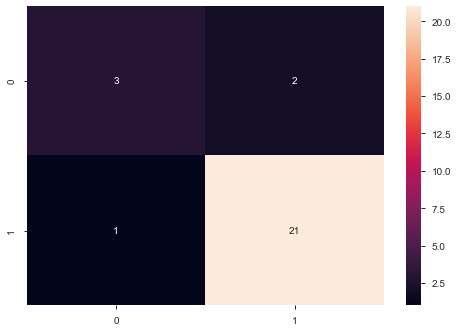

In [149]:
"""
We will only do confusion metrics of CatBoost
"""
cm = confusion_matrix(y_test, catboostOpt_ypred)
sns.heatmap(cm, annot=True)

In [152]:
cr = classification_report(y_test, catboostOpt_ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.91      0.95      0.93        22

    accuracy                           0.89        27
   macro avg       0.83      0.78      0.80        27
weighted avg       0.88      0.89      0.88        27



## Conclusion:
- Catboost and ANN performed better
- Production is done using app.py file
- Deployment is done using Heroku